# Feature Selection and Finding Correlation  
Examples to illustrate how to find features that are strongly correlated with each other

In [1]:
# Load required library
# mlbench provides several datasets from the UCI Machine Learning repository
library(caret)
library(mlbench)

Loading required package: lattice
Loading required package: ggplot2


## Finding features that are highly correlated with each other  
Package caret provides a findCorrelation matrix

In [2]:
# Goal is to classify a given silhouette as one of four types of vehicle
# features are extracted from the silhouette
data(Vehicle)
head(Vehicle)
ncol(Vehicle)

Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus


[1] 19

In [3]:
# calculate correlation matrix
correlationMatrix <- cor(Vehicle[,1:18])
print(correlationMatrix) 

                    Comp        Circ     D.Circ      Rad.Ra  Pr.Axis.Ra
Comp          1.00000000  0.69286923  0.7924440  0.69165856  0.09322213
Circ          0.69286923  1.00000000  0.7984920  0.62277837  0.14969187
D.Circ        0.79244402  0.79849200  1.0000000  0.77164394  0.16152916
Rad.Ra        0.69165856  0.62277837  0.7716439  1.00000000  0.66540656
Pr.Axis.Ra    0.09322213  0.14969187  0.1615292  0.66540656  1.00000000
Max.L.Ra      0.14824919  0.24746673  0.2643086  0.44804838  0.64809643
Scat.Ra       0.81300326  0.86036714  0.9072801  0.73846048  0.10606364
Elong        -0.78864702 -0.82875480 -0.9123072 -0.79255741 -0.18508583
Pr.Axis.Rect  0.81343702  0.85792532  0.8953261  0.71149706  0.07998168
Max.L.Rect    0.67614317  0.96577578  0.7745238  0.57015440  0.12916829
Sc.Var.Maxis  0.76441546  0.80849631  0.8644323  0.79758793  0.27470468
Sc.Var.maxis  0.81863161  0.85267941  0.8896611  0.72578142  0.09218201
Ra.Gyr        0.58534709  0.93608041  0.7058181  0.53906903  0.1

In [4]:
# Identify highly correlated
highCorrelation <- findCorrelation(correlationMatrix, cutoff=0.5)
print(highCorrelation)

 [1]  3  8 11  7  9 12  4  2  1 13 18  6 17


In [5]:
# Show the columnNames
colnames(Vehicle[highCorrelation])

[1] "D.Circ"       "Elong"        "Sc.Var.Maxis" "Scat.Ra"      "Pr.Axis.Rect"
 [6] "Sc.Var.maxis" "Rad.Ra"       "Circ"         "Comp"         "Ra.Gyr"      
[11] "Holl.Ra"      "Max.L.Ra"     "Kurt.Maxis"

## Ranking Features

In [6]:
# Define train contrpl
control <- trainControl(method="repeatedcv", number=10, repeats=3)


In [7]:
# Training the model
model <- train(Class~., data=Vehicle, method="rpart", preProcess="scale", trControl=control)


Loading required package: rpart


In [8]:
# Get the importance of each feature
importance <- varImp(model, scale=FALSE)
print(importance)

rpart variable importance

             Overall
Max.L.Ra      131.38
Sc.Var.Maxis   89.11
Elong          88.61
Sc.Var.maxis   62.50
Scat.Ra        58.38
Skew.Maxis     36.65
Holl.Ra        33.68
D.Circ          0.00
Comp            0.00
Ra.Gyr          0.00
Kurt.Maxis      0.00
Circ            0.00
Pr.Axis.Rect    0.00
Kurt.maxis      0.00
Rad.Ra          0.00
Pr.Axis.Ra      0.00
Max.L.Rect      0.00
Skew.maxis      0.00


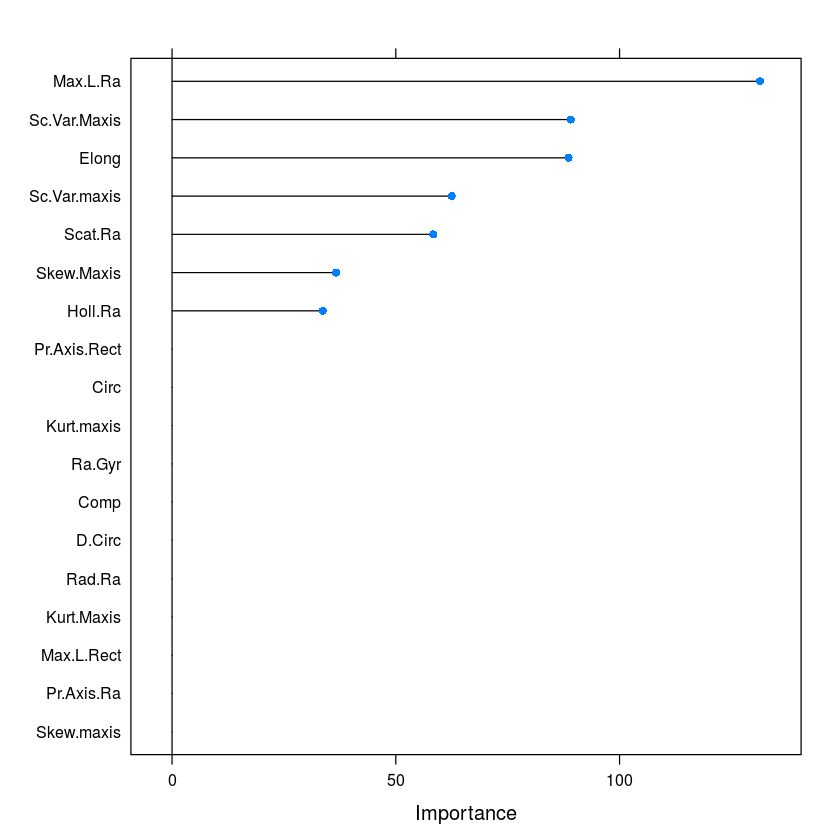

In [9]:
plot(importance)

## Feature Selection

In [10]:
# define the control using a random forest selection function
control <- rfeControl(functions=rfFuncs, method="cv", number=10)


In [ ]:
# run the RFE algorithm
results <- rfe(Vehicle[,1:18], Vehicle[,19], sizes=c(1:18), rfeControl=control)


Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [ ]:
# summarize the results
print(results)

# list the chosen features
predictors(results)
